## 置信区间
#### 是基于我们的观测结果给出的合理估值范围，它的中心值仍然是样本均值，但是在不确定的地方预留了一些空间，选择置信区间的方式与样本的均值分布有关
## 95%置信区间的意思是：如果从100个不同样本中计算置信区间，其中95个“包含真实的样本总均值均值”

## 概率计算

### 经验概率
经验概率是在实际数据中观察到的概率，它有一些不确定性，和实验室样本统计一样可以让我们接近真正的理论概率。但是经验概率并不总是等于理论概率，这是因为任何样本都有不确定性和随机性
### 理论概率
理论概率与经验概率相较而言，更像是我们无法直接看到的普遍真理。我们可以用经验概率推测接近理论概率

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

data = np.array([np.random.randint(100) for i in range(101)])
data

array([35, 58, 10, 84,  9, 58, 50, 93, 17, 31, 49, 43, 74,  0, 43, 68,  4,
       50, 74, 29, 43, 80, 57, 62,  5, 92, 27, 24, 21, 75, 33, 58, 37, 82,
       68,  2, 39, 25, 17, 90, 35, 34, 88, 30, 72, 78, 17, 62,  4, 79,  2,
       78, 37, 71, 88, 42, 61, 45, 77, 74, 94, 79, 78, 76, 53, 61, 95, 23,
       91, 79, 63, 45, 18, 57, 52, 34, 70, 85, 72, 39, 17, 95, 20, 34, 98,
       11, 76, 61, 38, 43, 51,  5, 31, 75, 26, 86, 77, 25, 68, 68, 81])

In [2]:
np.mean(data)   #求均值

51.881188118811885

In [3]:
np.median(data) #求中位数

53.0

In [4]:
stats.mode(data)[0][0] #求众数

17

In [5]:
def quarterback_method(vector):
    '''四分位法'''
    lower_q=np.quantile(vector,0.25,interpolation='lower')#下四分卫数
    higher_q=np.quantile(vector,0.75,interpolation='higher')#上四分位数
    middle_q = np.median(vector) #中位数
    int_r=higher_q-lower_q#四分位距
    numbers = [lower_q,middle_q,higher_q,int_r] #分位数整理
    data = [vector[vector<i] for i in numbers][:-1] #前75%分位的数
    new_data = np.setdiff1d(vector,np.hstack((data[1],data[2]))) #后25分位的数
    return numbers,data+[new_data] #分位数和四分位后的数据
    
quarterback_method(data)

([31, 53.0, 76, 45],
 [array([10,  9, 17,  0,  4, 29,  5, 27, 24, 21,  2, 25, 17, 30, 17,  4,  2,
         23, 18, 17, 20, 11,  5, 26, 25]),
  array([35, 10,  9, 50, 17, 31, 49, 43,  0, 43,  4, 50, 29, 43,  5, 27, 24,
         21, 33, 37,  2, 39, 25, 17, 35, 34, 30, 17,  4,  2, 37, 42, 45, 23,
         45, 18, 52, 34, 39, 17, 20, 34, 11, 38, 43, 51,  5, 31, 26, 25]),
  array([35, 58, 10,  9, 58, 50, 17, 31, 49, 43, 74,  0, 43, 68,  4, 50, 74,
         29, 43, 57, 62,  5, 27, 24, 21, 75, 33, 58, 37, 68,  2, 39, 25, 17,
         35, 34, 30, 72, 17, 62,  4,  2, 37, 71, 42, 61, 45, 74, 53, 61, 23,
         63, 45, 18, 57, 52, 34, 70, 72, 39, 17, 20, 34, 11, 61, 38, 43, 51,
          5, 31, 75, 26, 25, 68, 68]),
  array([76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 88, 90, 91, 92, 93, 94, 95,
         98])])

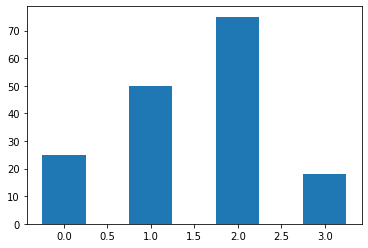

In [6]:
#查看每一个分位的数字概率分布
plt.bar(x=range(4),height=[len(i) for i in quarterback_method(data)[-1]],width=0.5)
plt.show()
plt.close()

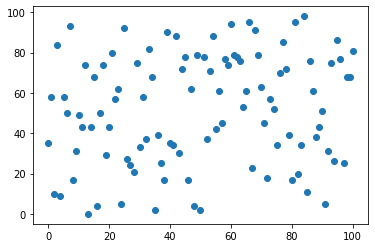

In [7]:
plt.scatter(x = range(len(data)) , y =data) #数据分布散点图

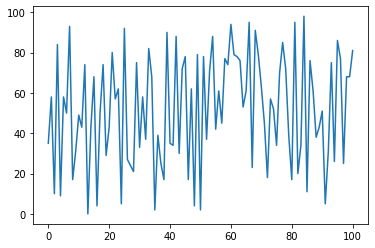

In [8]:
plt.plot(data) #数据顺序折线图

## 1.0 概率加法
## 加法：本意为”或“，分类运算，适合用于相对独立事件之间的加总，其中一个变量的增量Δ对整体的增量也为Δ；例如：计算全班同学成绩的总和
### 完整的概率加法公式为:(两个事件的发生概率不具有互斥性) 
## P(A∪B)=P(A)+P(B)-P(AB) 
#### (公式解释：因为P是A，B分别的全局概率的组合 P(A)加上P(B)得到了全局里A出现的概率和B出现的的概率之和，但是其中一定会出现AB组合出现的情况，所以要减去 P(AB)，也就是AB组合出现的概率)
### 当两个事件之间具有互斥性，假如同时计算两者在全概率中的占比，则实用概率加法:
## P(A∪B) = P(A)+P(B)


In [18]:
def drobability_addition1(vector,subset_A,subset_B):
    '''概率互斥时概率加法'''
    return len(subset_A)/len(vector)+len(subset_B)/len(vector)

for_split_data= quarterback_method(data)[-1]
drobability_addition(data,for_split_data[0],for_split_data[1])

NameError: name 'drobability_addition' is not defined

In [10]:
def drobability_addition2(set_A,set_B,subset_A,subset_B):
    '''概率加法函数'''
    mylist = [[[i,j] for j in set_B] for i in set_A] #组合两个数据结构
    all_data = np.array([i for j in range(len(mylist)) for i in mylist[j]]) #组合数据结构降为二维
    P = lambda subset : len(all_data[np.squeeze(np.dot((all_data == subset),np.array([[1],[1]]))>0)])/len(all_data) #但条件满足频率统计函数
    P_AB = sum(np.dot((all_data == np.array([subset_A,subset_B])),np.array([1,1]))==2)/len(all_data) #双条件同时满足频率
    return P(subset_A) + P(subset_B) - P_AB #计算P(A),P(B)加法结果
a,b= [0,1],[1,2,3,4,5,6]
drobability_addition2(a,b,1,6)

0.6666666666666666

## 概率乘法
## 乘法：本质为”与“，分步运算，各件事并不独立，互相影响。其中一个变量的增量Δ对整体的影响并不是Δ，还要混入其他变量的取值影响
### 概率乘法则更容易找出更多不同情况同时存在的可能性

In [11]:
testdata = np.arange(100)
test1 = testdata[testdata < np.random.randint(100)]
test2 = testdata[testdata < np.random.randint(100)]

In [12]:
def probability_multiplication(set_A,set_B,subset_A,subset_B):
    '''概率乘法函数'''
    return (len(subset_A)/len(set_A))*(len(subset_B)/len(set_A))

probability_multiplication(testdata,testdata,test1,test2)

0.018

In [13]:
def probability_addition2(set_A,set_B,subset_A,subset_B):
    '''概率乘法函数'''
    return (len(subset_A)/len(set_A)) + (len(subset_B)/len(set_B)) -(len(subset_A)/len(set_A))*(len(subset_B)/len(set_A))
probability_addition2(testdata,testdata,test1,test2)

0.34199999999999997

## 二项分布

In [14]:

np.set_printoptions(suppress=True)

# 一周有五天，假如有一天你一定会震惊，求只有一次震惊的概率，那么第一天的震惊的概率分布如下
shocked_1 = [0.2,0.8,0.8,0.8,0.8] #一周的事件发生的概率

def multi(listdata):
    '''
    累乘函數
    '''
    n = 1
    for i in listdata:
        n *= i
    return n

'第一日事件发生的概率为：',multi(shocked_1),'累计一周事件发生一次的概率为',multi(shocked_1)*len(shocked_1)

('第一日事件发生的概率为：', 0.08192000000000003, '累计一周事件发生一次的概率为', 0.4096000000000002)

In [15]:
def Drop_Weft_Funciton(mylist): 
    '''
    二维降一维
    '''
    return [i for j in range(len(mylist)) for i in mylist[j]]
    

In [16]:
def E_x_(P,n) : 
    '''
    二项分布期望
    '''
    expr = n*P
    return expr,{'重复'+str(n)+'后可以成功的次数约为':expr }
E_x_(0.5,5)

(2.5, {'重复5后可以成功的次数约为': 2.5})

In [17]:

def as_num(x):
    '''科学计数转数字'''
    y = '{:.10000f}'.format(x) # 5f表示保留5位小数点的float型
    num = []
    results = []
    for i in y[::-1]:
        num.append(i)      
        test = sum(list(map(lambda x : ord(x) in list(range(48,57)) and int(x) or 0 , num )))
        if test != 0:
            results.append(i)
    return 'P = '+''.join(results[::-1])+'%'

def factorial0(n):
    '''递归阶乘'''
    if n == 0:       
        return 1
    else:
        return n * factorial(n - 1)

def factorial(a):
    '''循环阶乘'''
    num = 1
    if a < 0:
        print('负数没有阶乘')
    elif a == 0:
        print('0的阶乘为1')
    else :
        for i in range(1,a + 1):
            num *= i
    return num
factorial2(10000)

np.set_printoptions(suppress=True)
def binomial_distribution(P,k,n):
    '''二项分布函数'''
    reverse_of_P = 1-P #反向的概率
    Ps = (P ** k) #正向的概率和
    reverse_of_Ps = np.power(reverse_of_P, (n - k)) # 反项概率和
    Cnk = factorial(n)/(factorial(n-k)*factorial(k)) # 二项系数
    expr = Cnk * (Ps * reverse_of_Ps) #条件成功概率
    return expr 

dead = 0.05 #死亡率
count_ppl = 10000 #共有20人
times = 1
P = binomial_distribution(P=dead,k=times,n=count_ppl)
'不会有人死亡的可能性为:', 
p_s = [binomial_distribution(P=dead,k=0,n=i) for i in range(1,count_ppl)]
plt.plot(p_s),P

NameError: name 'factorial2' is not defined